In [22]:
import pandas as pd
import os

In [23]:
os.getcwd()

'd:\\Code\\PythonAZ'

In [24]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [25]:
movies.shape

(559, 6)

In [26]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [27]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [28]:
movies.columns=['Film','Genre','CriticsRating','AudienceRating','BudgetMillions','Year']

In [29]:
movies.head()

,Film,Genre,CriticsRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticsRating   559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.9+ KB


In [31]:
movies.describe()

,CriticsRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [32]:
# Film is treated as a object but it should be a category.
movies.Film = movies.Film.astype('category')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    object  
 2   CriticsRating   559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    int64   
dtypes: category(1), int64(4), object(1)
memory usage: 35.0+ KB


In [33]:
# Same with genre and year
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticsRating   559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 29.9 KB


In [34]:
# To find out what unique catories exist
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [37]:
# .describe() now does not show the categories bc it does not make sense
movies.describe()

,CriticsRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

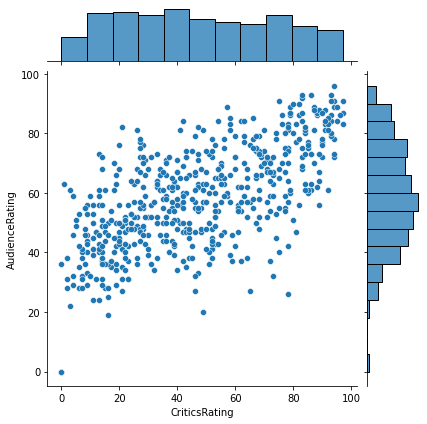

In [41]:
# Jointplot
j = sns.jointplot(data=movies, x='CriticsRating', y='AudienceRating')

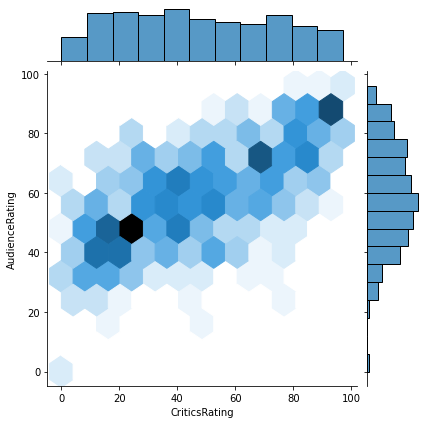

In [42]:
# Using kind='hex' to identify clusters
j = sns.jointplot(data=movies, x='CriticsRating', y='AudienceRating', kind='hex')

In [ ]:
# Histograms

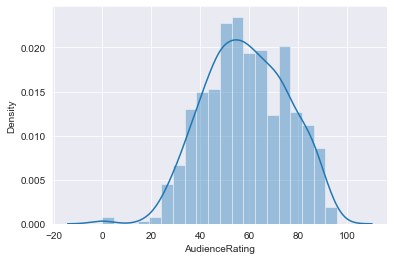

In [51]:
sns.set_style('darkgrid')
m1 = sns.distplot(movies.AudienceRating, bins=20)

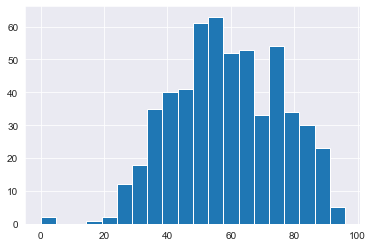

In [52]:
n1 = plt.hist(movies.AudienceRating, bins=20)

In [ ]:
# Grid styling
sns.set_style('darkgrid')
sns.set_style('white')

In [ ]:
# Stacked histograms

<function matplotlib.pyplot.show(*args, **kw)>

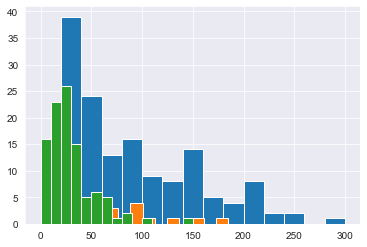

In [65]:
# By specifying each data column separately we get overlaid columns
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=15)
plt.show

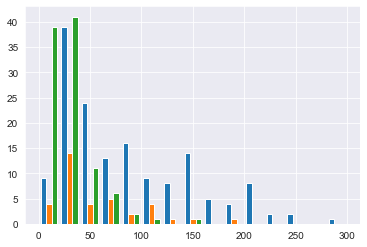

In [72]:
# To get columns next to each other, we need to send data in as a list
plt.hist(\
[movies[movies.Genre == 'Action'].BudgetMillions, \
movies[movies.Genre == 'Thriller'].BudgetMillions, \
movies[movies.Genre == 'Drama'].BudgetMillions], \
bins=15)
plt.show()



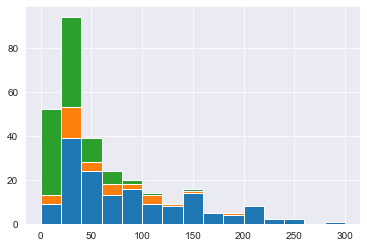

In [73]:
# To get columns stacked, we need to add "stacked=True"
plt.hist(\
[movies[movies.Genre == 'Action'].BudgetMillions, \
movies[movies.Genre == 'Thriller'].BudgetMillions, \
movies[movies.Genre == 'Drama'].BudgetMillions], \
bins=15, stacked=True)
plt.show()

In [74]:
# Let's automate this plot over all the genres
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


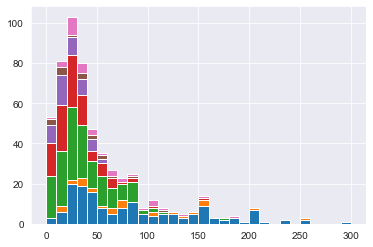

In [77]:
# create an empty list and then populate it with series of budgets per genre
# append changes the underlying object
# plot the list
# stacked
# rwidth=1 -> no gaps
list1 = []
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1)

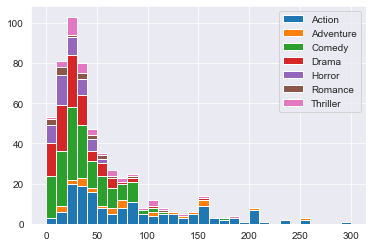

In [81]:
# add a legend
# we need a list of labels to pass to 'label'

list1 = []
mylabels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.legend() # to display the legend
plt.show() # to remove "# plt.legend() to display the legend" message

In [ ]:
# We want to study critic rating vs audience rating

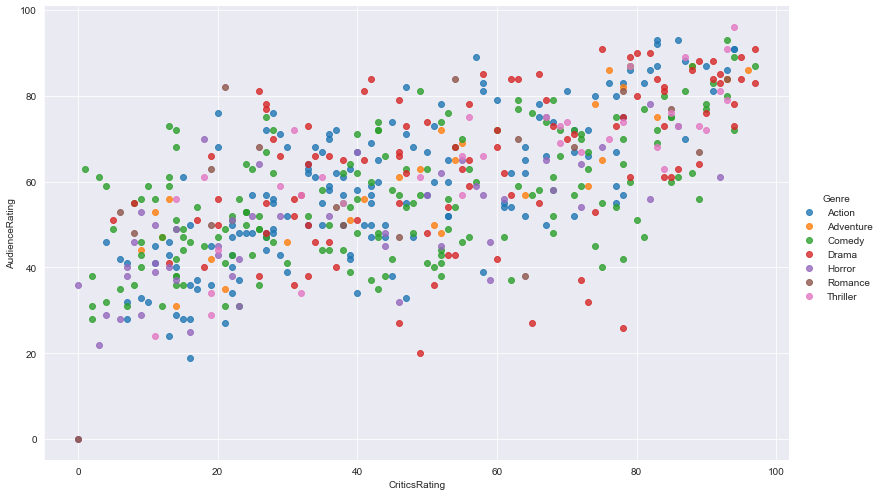

In [88]:
#First we create a scatter plot to achieve this
vis1 = sns.lmplot(data=movies, x='CriticsRating', y= 'AudienceRating',\
    fit_reg=False, hue='Genre',\
        size=7, aspect=1.6)
#Not great to see anything useful
#Great idea to check out the seaborn gallery to see if something would help

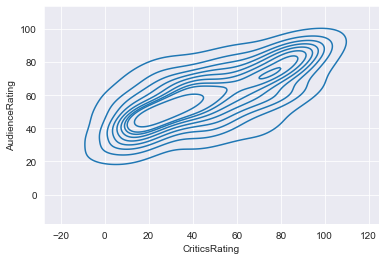

In [89]:
# Kernel density estimate (KDE) plot to study audience rating vs critic rating
# Assessing a bivariate distribution based on the kernel density estimate plot
k1=sns.kdeplot(movies.CriticsRating, movies.AudienceRating)
# Shows the density of datapoints. Where do the ratings usually fall?

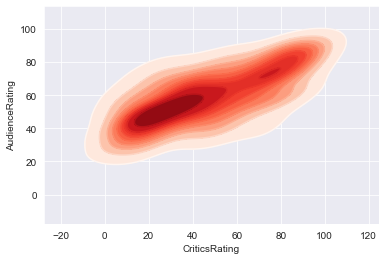

In [93]:
# Let's make it pretty
k1=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    shade=True, shade_lowest=False, cmap='Reds')
# To remove the hard edges, we run shaded edges from 1 plot 
# together with the shaded insides from a second plot
k1b=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    cmap='Reds')
# We achieve peak smoothness

In [ ]:
# Working with Subplots()

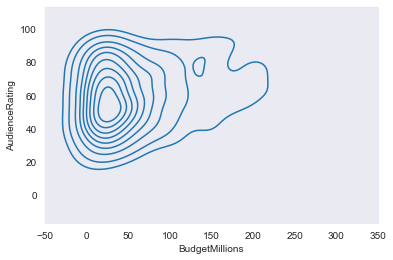

In [96]:
sns.set_style('dark')
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating)

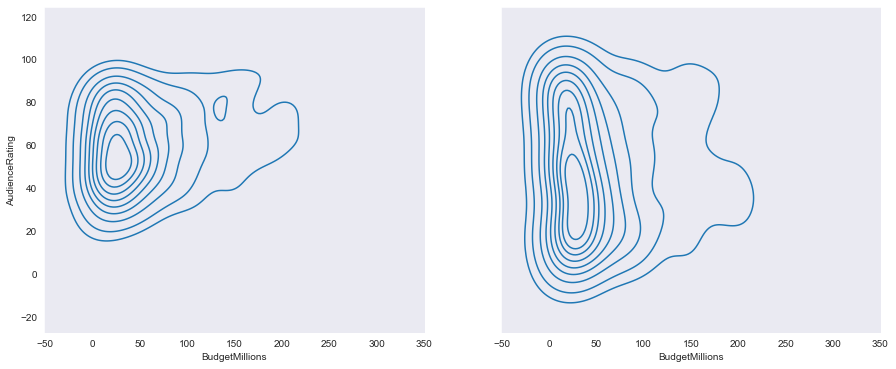

In [108]:
# Creating subplots - 1 row 2 columns, size, WxH
# fig, ax: tuple
# fig is a figure object
# ax is either a single axis object or an array of axs objects
# x- and y-axis are identical in all subplots

f, axes = plt.subplots(1,2, figsize=(15,6), sharex=True, sharey=True)
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax=axes[0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticsRating, ax=axes[1])
# k1.set(xlim=(-20,160)) Setting x-axis limits
# k2.set(xlim=(-20,160))

In [ ]:
# ViolinPlots
# and how they compare to BoxPlots

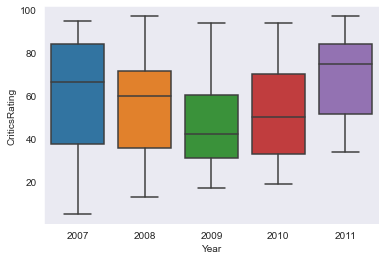

In [111]:
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x= 'Year', y= 'CriticsRating')

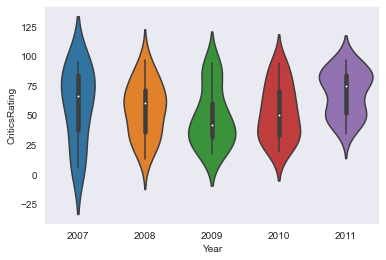

In [112]:
z = sns.violinplot(data=movies[movies.Genre=='Drama'], x= 'Year', y= 'CriticsRating')

In [117]:
# Creating a facet grid
# we will be creating multiple charts for separate genres, etc

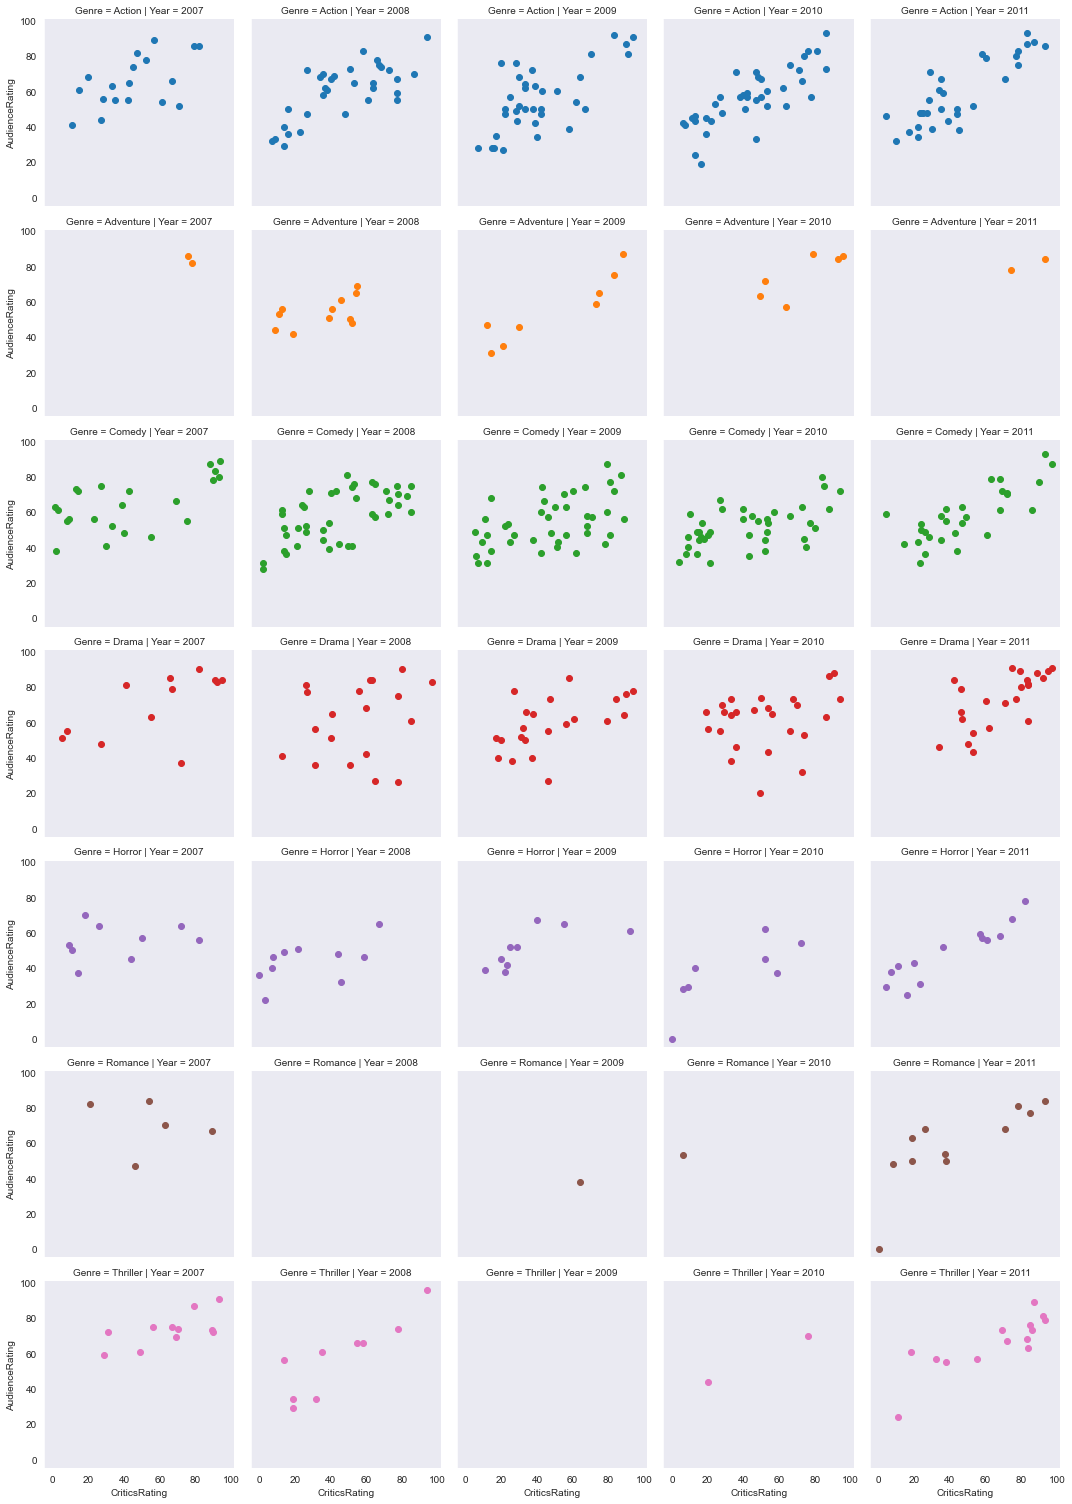

In [120]:
# Creating a FacetGrid where we get 
# one row per each Genre item
# one column per each each Year item
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
# Mapping something on our FacetGrid (func, args)
# Need to run it together with the Facegrid creation
g=g.map(plt.scatter, 'CriticsRating', 'AudienceRating')

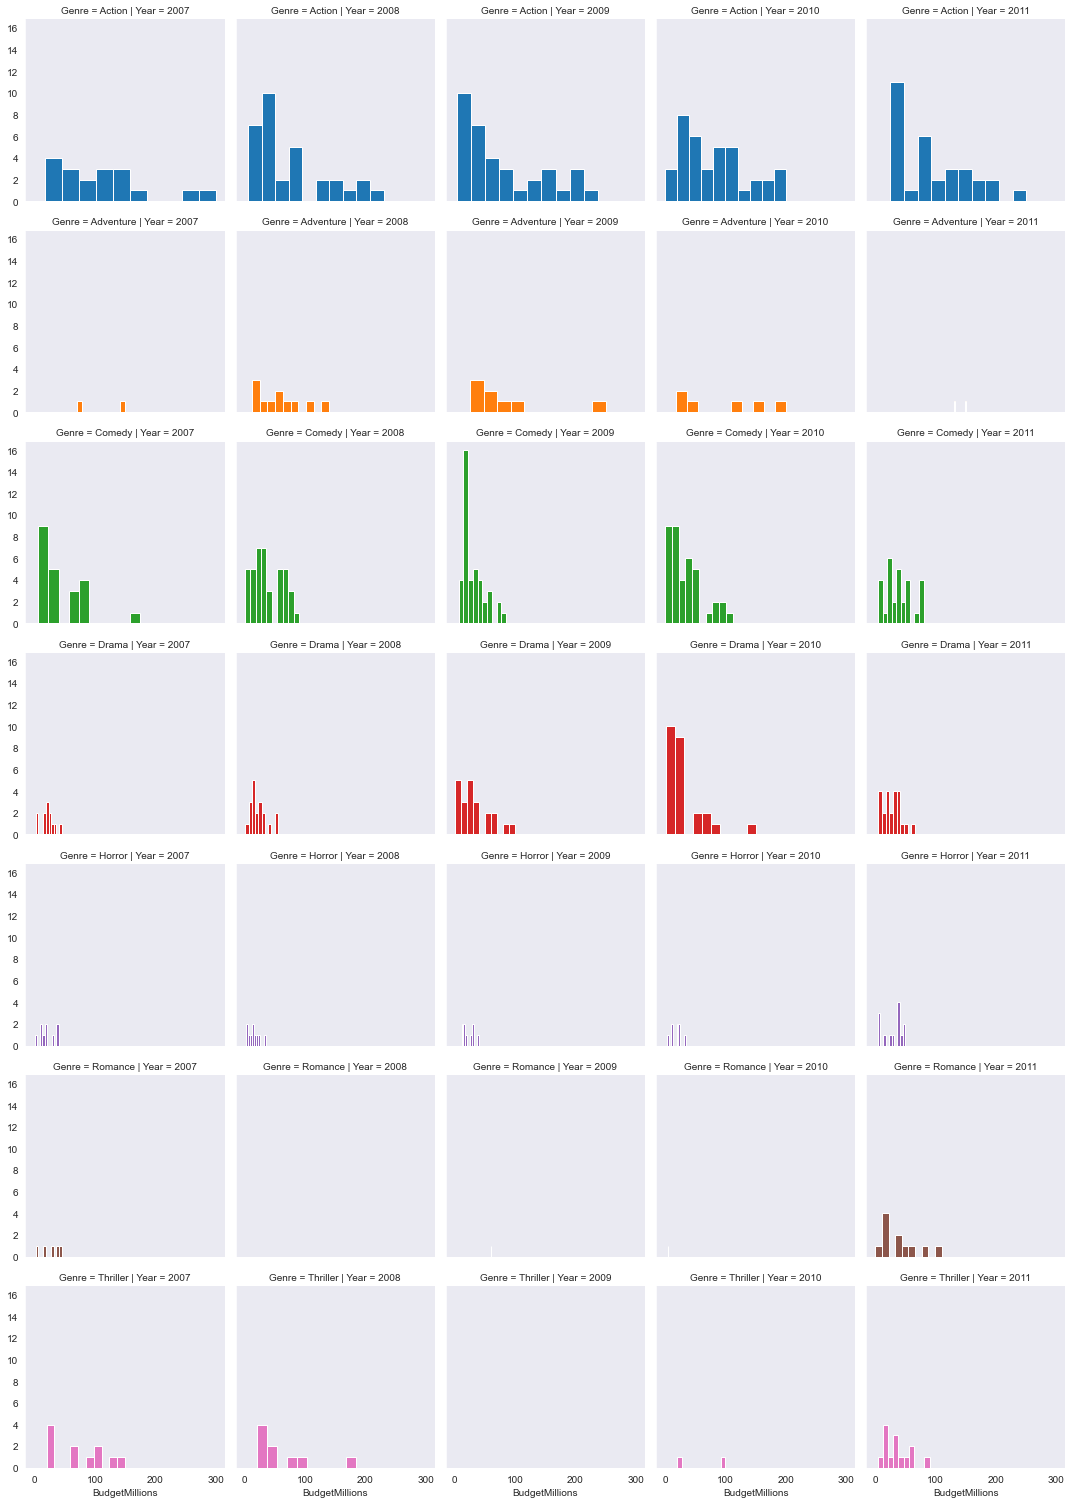

In [122]:
# Histograms instead of scatterplots
# Only need to map 1 argument
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g=g.map(plt.hist, 'BudgetMillions')

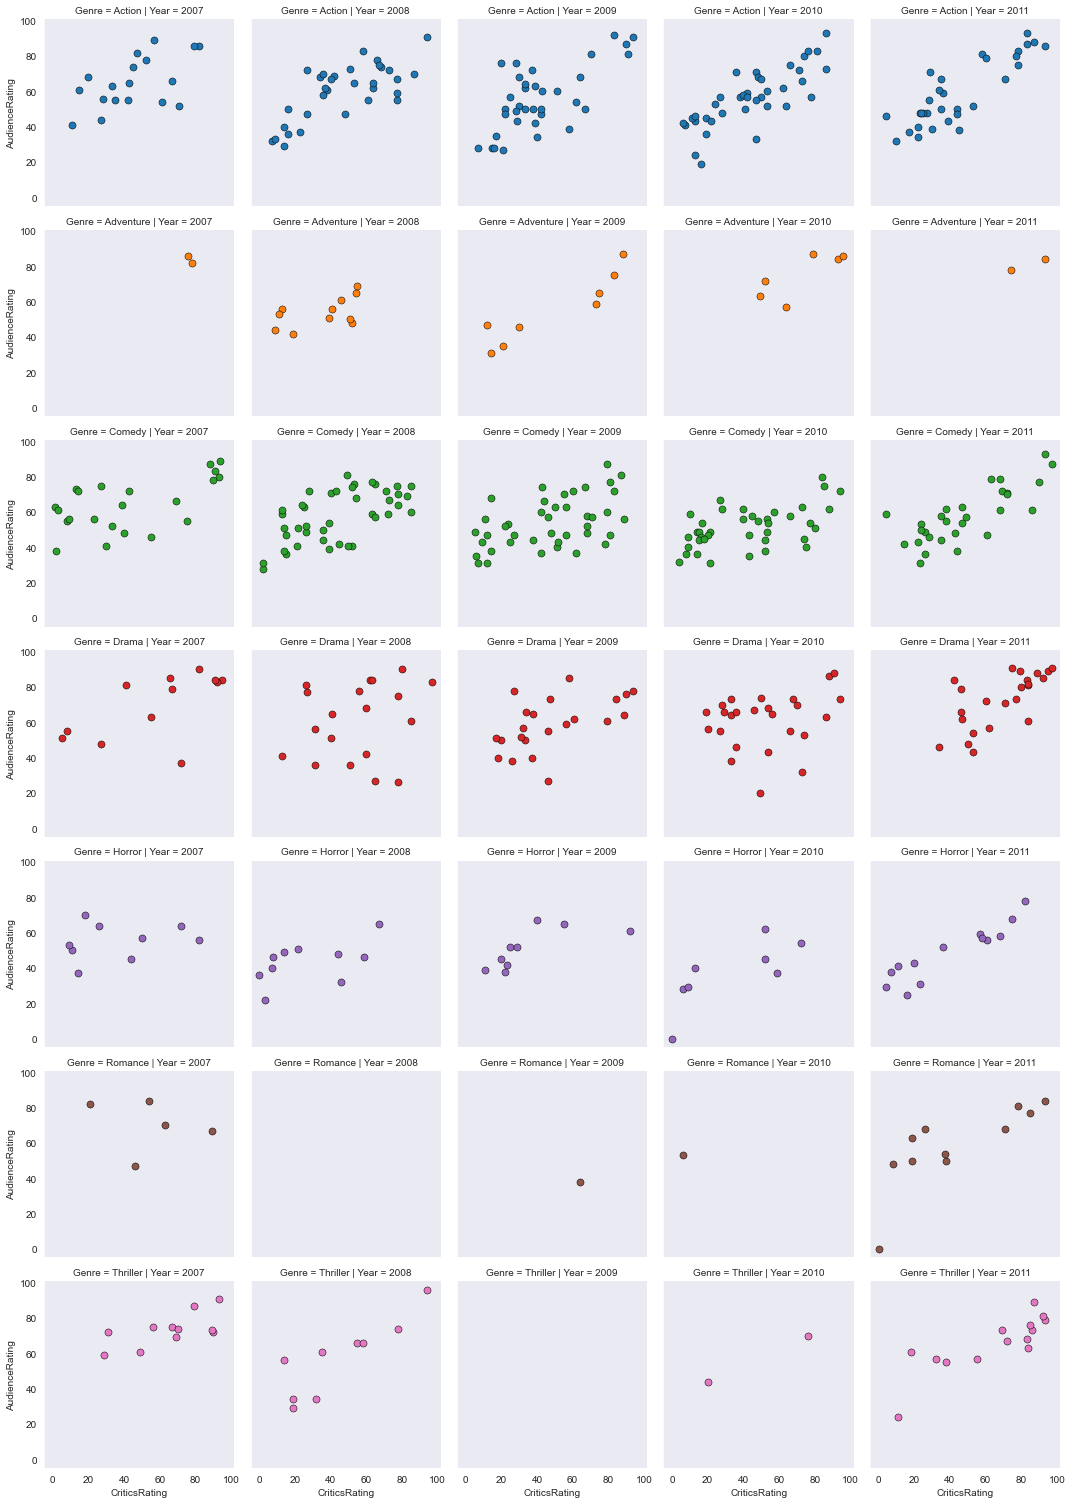

In [123]:
# Back to scatterplots
# Adding keyword arguments (**kws) that change the visuals of datapoints
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticsRating', 'AudienceRating', **kws)

In [ ]:
# Axis and diagonals

# We want to compare how the critics and the audience rating compare for different genres and years.
# We want to add diagonals and limit the axis

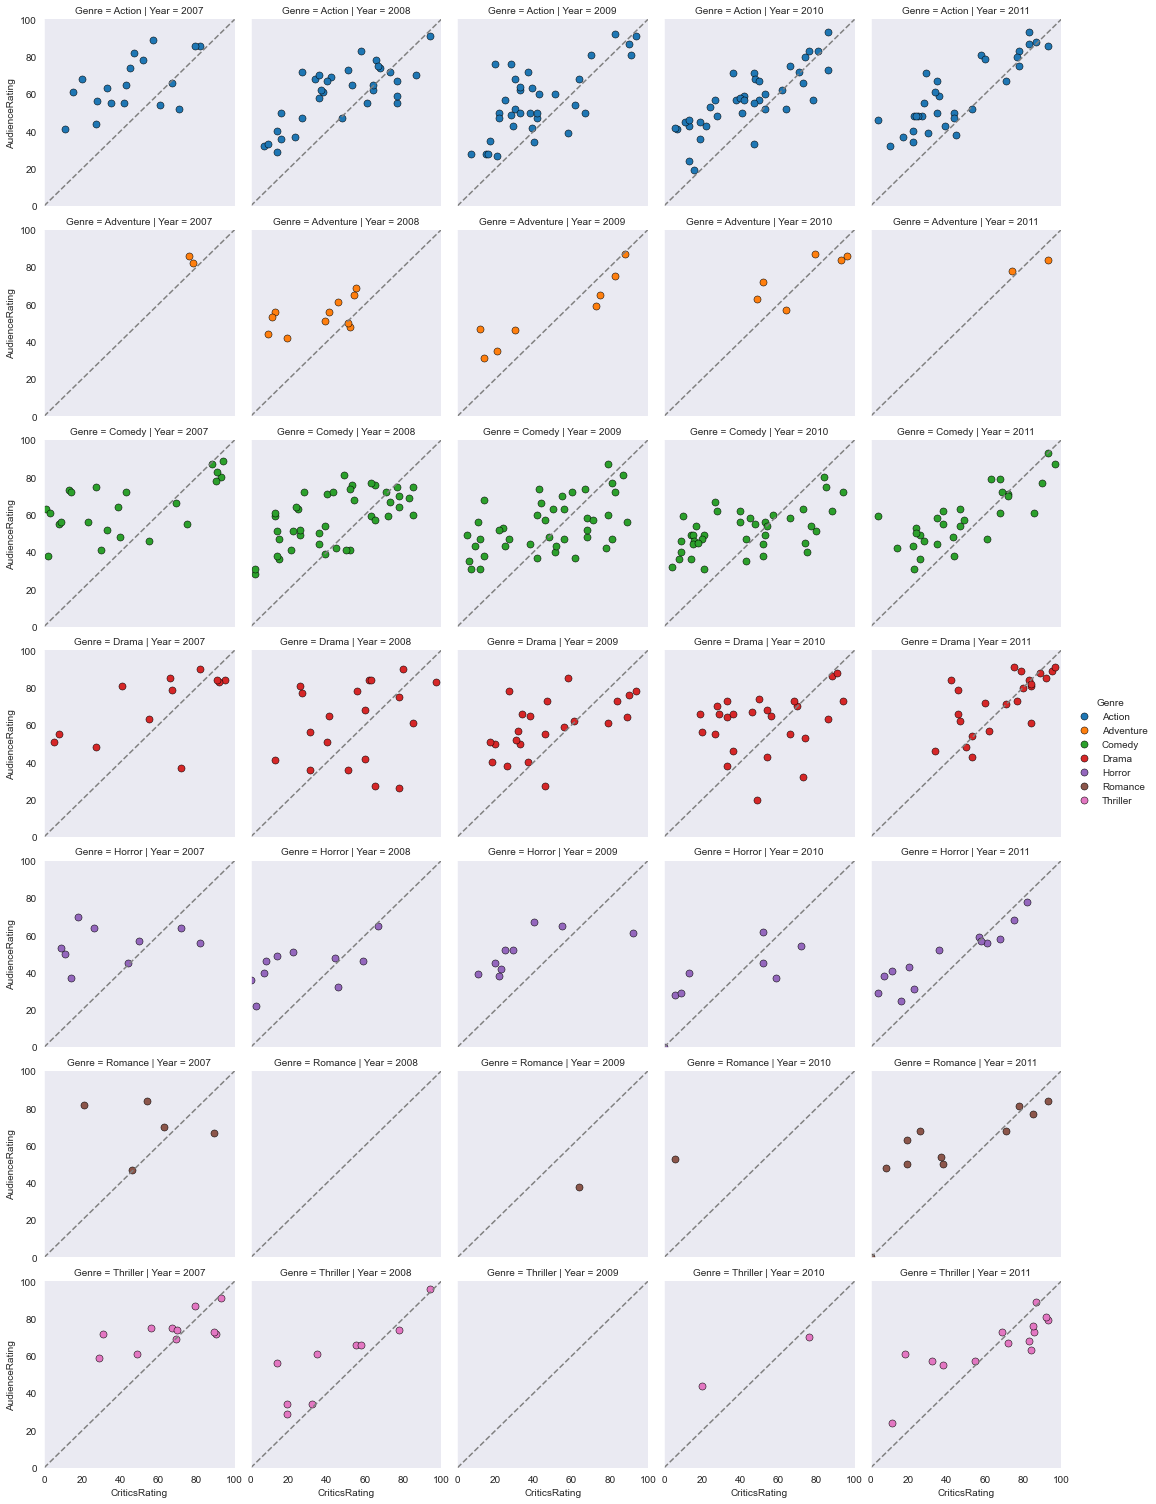

In [129]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticsRating', 'AudienceRating', **kws)
#Axis is easy
g.set(xlim=(0,100), ylim=(0,100))
# for diagonals we need loop through every subplot bc Python is not vectorized
# Creating a grey dashed line from 0 to 100 on each axis
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray", ls="--")
g.add_legend()

In [ ]:
# We can see that:
# in 2009 action movies, the audience gave much better ratings than the critics
# in 2011 dramas, the critics were a bit more prone to give positive ratings than the audience

In [ ]:
# Building dashboards

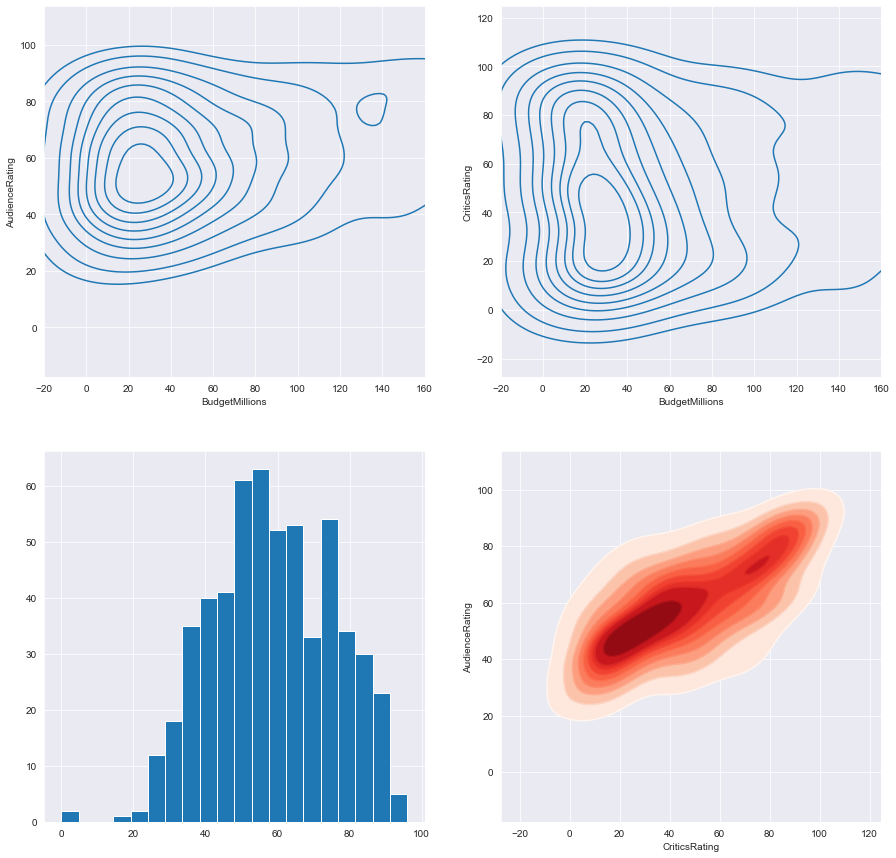

In [144]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticsRating, ax=axes[0,1])

# Let's add a non-Seaborn plot
# We need to specify locatin the way pyplot likes it
# axes[x,y] is a pyplot object. We cannot get Seaborn plots through it. 
# It only has access to pyplot functions and methods
# Seaborn is upgrade  on top of pyplot. 
# Axis does not know about stuff in the Seaborn package
axes[1,0].hist(movies.AudienceRating, bins=20)

k4=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])

k4b=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160)) # Setting x-axis limits
k2.set(xlim=(-20,160)) # Setting x-axis limits

plt.show()

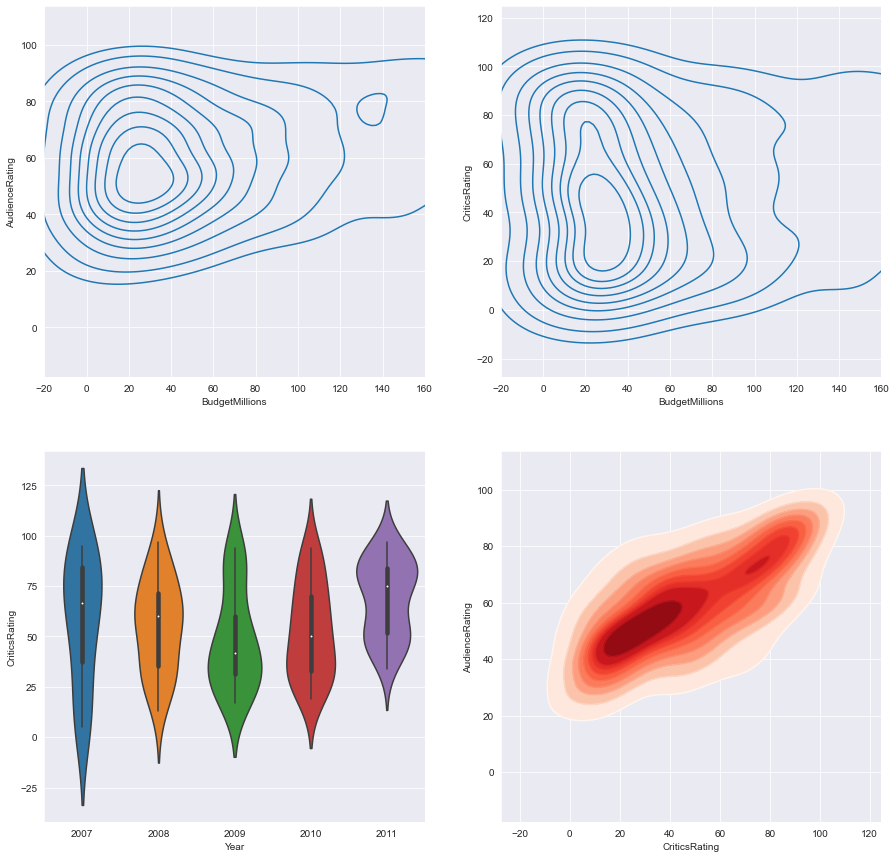

In [148]:
# A dashboard with four Seaborn subplots

sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, ax=axes[0,0])
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticsRating, ax=axes[0,1])

z = sns.violinplot(data=movies[movies.Genre=='Drama'], x= 'Year', y= 'CriticsRating', ax=axes[1,0])

k4=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])

k4b=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160)) # Setting x-axis limits
k2.set(xlim=(-20,160)) # Setting x-axis limits

plt.show()

In [149]:
# Styling dashboards
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

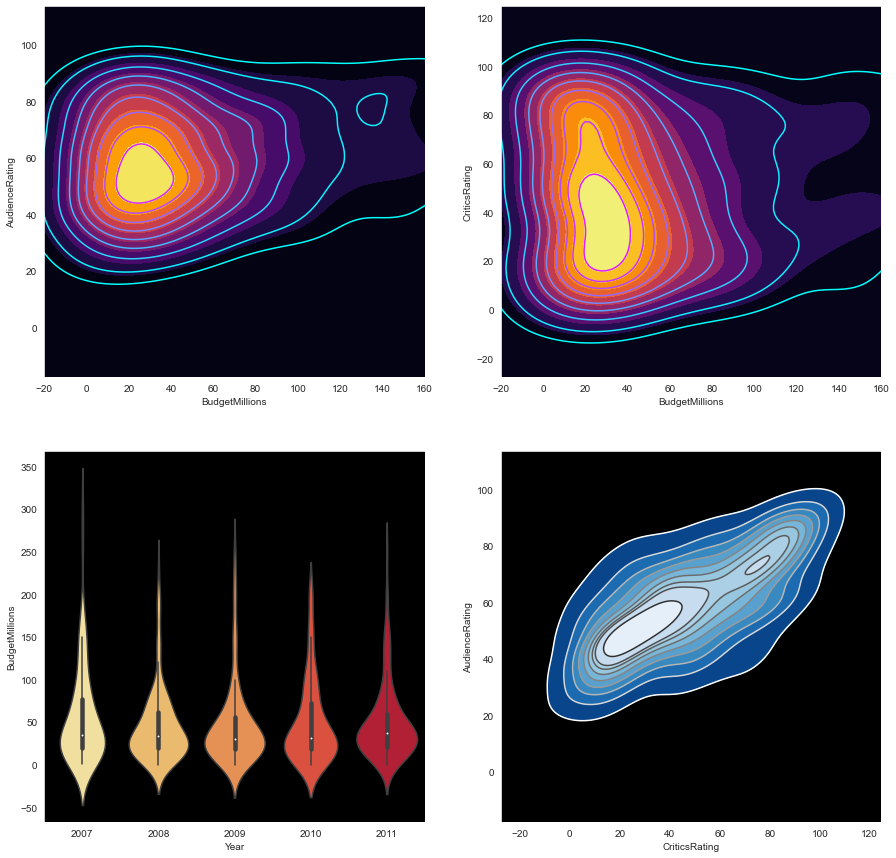

In [165]:

# Default options: white, whitegrid, dark, darkgrid, ticks
# We pass a keyword argument 'axes.facecolor' to edit the background color
sns.set_style('dark', {'axes.facecolor':'black'})
              
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot [0,0]
k1=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, \
    ax=axes[0,0], \
    shade=True, shade_lowest=True , cmap='inferno')
#Adding an outline
k1b=sns.kdeplot(movies.BudgetMillions,movies.AudienceRating, \
    ax=axes[0,0], \
    cmap='cool')

#Plot [0,1]
k2=sns.kdeplot(movies.BudgetMillions,movies.CriticsRating, \
    ax=axes[0,1], \
    shade=True, shade_lowest=True, cmap='inferno')
#Adding an outline
k2b=sns.kdeplot(movies.BudgetMillions,movies.CriticsRating, \
    ax=axes[0,1], \
    cmap='cool')

#Plot [1,0]
z = sns.violinplot(data=movies, x= 'Year', y= 'BudgetMillions', \
    ax=axes[1,0], \
    palette='YlOrRd') # Yellow+Orage+Red

#Plot [1,1]
k4=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])

k4b=sns.kdeplot(movies.CriticsRating, movies.AudienceRating, \
    cmap='gist_gray_r', ax=axes[1,1])

k1.set(xlim=(-20,160)) # Setting x-axis limits
k2.set(xlim=(-20,160)) # Setting x-axis limits

plt.show()

In [ ]:
# Finishing touches

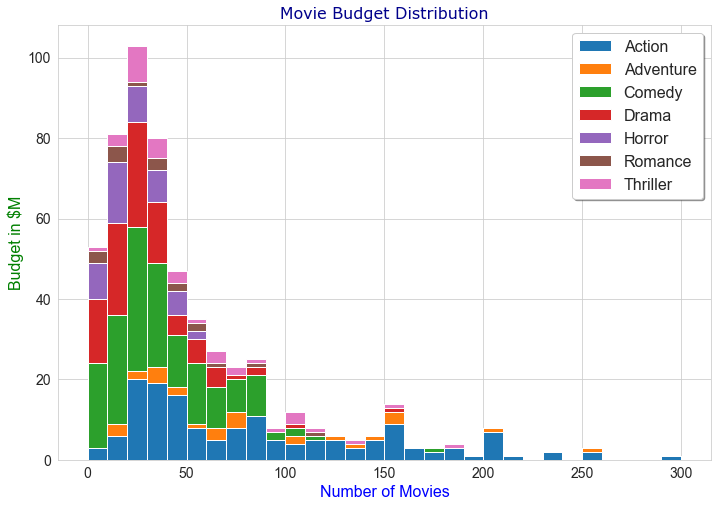

In [195]:
list1 = []
mylabels=[]
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == gen].BudgetMillions)
    mylabels.append(gen)
sns.set_style("whitegrid") # We can use Seaborn styling even in a pyplot chart
fig, ax = plt.subplots() # Creating one subplot. 
# The plot with an unspecified location will go to the last box
# The next plot will go into the subplot
# We can then use suplots() methods to control the original plot
fig.set_size_inches(11.7,8,27) #size of A4 paper
h = plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
# Add a title
plt.title('Movie Budget Distribution', fontsize=16, \
    color='DarkBlue', fontname='Verdana')
plt.xlabel('Number of Movies', fontsize=16, color='Blue')
plt.ylabel('Budget in $M', fontsize=16, color='Green')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# to display the legend with shadow and frame visibility
plt.legend(frameon=True, \
            shadow=True, \
           framealpha=1, \
           prop={'size':16})
plt.show() # to remove "# plt.legend() to display the legend" message